In [287]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as iio

In [288]:
def convert_to_grayscale(img : np.ndarray):
  """Function that converts an image to grayscale with standard color weights.

  Parameters
  ----------

  img : np.ndarray
    Image to be converted."""

  return to_image(0.299*img[:, :, 0] + 0.587*img[:, :, 1] + 0.114*img[:, :, 2])

def normalize(img : np.ndarray, min = 0.0, max = 1.0):
  """Function that converts an image to the given desired range.
  
  Parameters
  ----------

  img : np.ndarray
    Image to be normalized.
  min : float
    Bottom value of the new range for conversion.
  max : float
    Top value of the new range for conversion."""
  return ((img - np.min(img))/(np.max(img) - np.min(img)))*(max - min) + min

def resize(img : np.ndarray, n : int):
  """Resizes n times the image.
  
  Parameters
  ----------
  
  img : np.ndarray
    Image to be resized.
  n : int
    Resize proportion."""
  
  width, height = img.shape[0], img.shape[1]

  n_width = np.arange(0, width, n)
  n_height = np.arange(0, height, n)

  return img[n_width[:, np.newaxis], n_height]

def gray_levels(img : np.ndarray, n : int):
  imin, imax = np.min(img), np.max(img)
  levels = np.arange(imin, imax, (imax - imin)/n)

  new_img = np.copy(img)
  
  for l in range(levels.shape[0] - 1):
    new_img[np.logical_and(new_img <= levels[l + 1], new_img > levels[l])] = levels[l + 1] 

  return new_img


def rgb_to_hsv(img : np.ndarray):
  """Converts RGB image to HSV range.
  
  Parameters
  ----------
  
  img : np.ndarray
    Image to be converted."""

  R, G, B = img[:, :, 0].astype(np.float32), img[:, :, 1].astype(np.float32), img[:, :, 2].astype(np.float32)

  M = np.max((R, G, B), axis = 0)
  m = np.min((R, G, B), axis = 0)

  C = M - m

  Hl = np.zeros(C.shape, dtype = np.float32)

  R_bool = np.bitwise_and(M == R, C != 0.0)
  G_bool = np.bitwise_and(M == G, C != 0.0)
  B_bool = np.bitwise_and(M == B, C != 0.0)

  Hl[C == 0.0] = 0.0
  Hl[R_bool] = np.mod((G[R_bool] - B[R_bool])/C[R_bool], 6.0, dtype = np.float32)
  Hl[G_bool] = (B[G_bool] - R[G_bool])/C[G_bool] + 2.0
  Hl[B_bool] = (R[B_bool] - G[B_bool])/C[B_bool] + 4.0
  
  H = 60.0*Hl

  V = M

  S = np.zeros(C.shape, dtype = np.float32)

  S[V != np.zeros(V.shape)] = (C[V != np.zeros(V.shape)]/V[V != np.zeros(V.shape)])

  HSV = np.array([H, S, V], dtype = np.float32)
  HSV = np.transpose(HSV.T, (1, 0, 2)).astype(np.float32)

  HSV[:, :, 0] = to_image(HSV[:, :, 0])
  HSV[:, :, 1] = to_image(HSV[:, :, 1])
  HSV[:, :, 2] = to_image(HSV[:, :, 2])

  return HSV.astype(np.uint8)

def to_image(img : np.ndarray):
  """Converts an image to the 8-bit unsigned integer range

  Parameters
  ----------

  img : np.ndarray
    Image to be converted."""
  
  return normalize(img, 0.0, 255.0).astype(np.uint8)




(-0.5, 1199.5, 1599.5, -0.5)

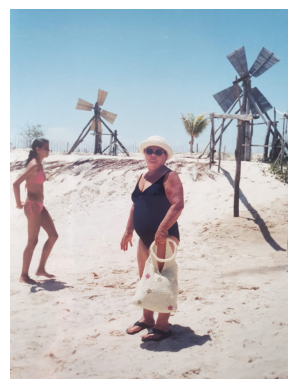

In [289]:
img = iio.imread("imagens/granny.png")

plt.imshow(img)
plt.axis("off")

(-0.5, 59.5, 79.5, -0.5)

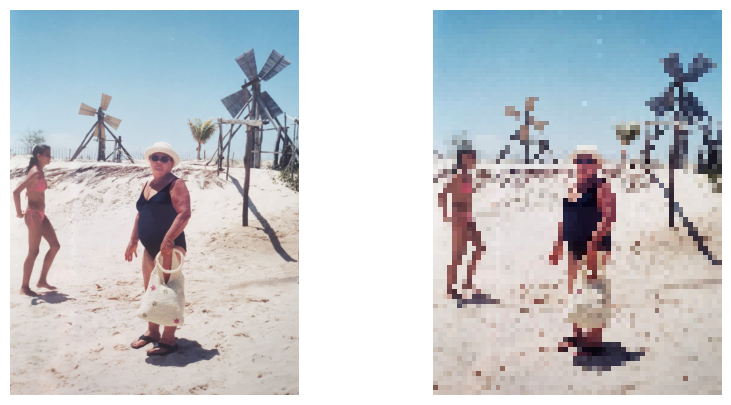

In [290]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.imshow(img)
plt.axis("off")

plt.subplot(122)
plt.imshow(to_image(resize(img, 20)), cmap = "gray")
plt.axis("off")


(-0.5, 1199.5, 1599.5, -0.5)

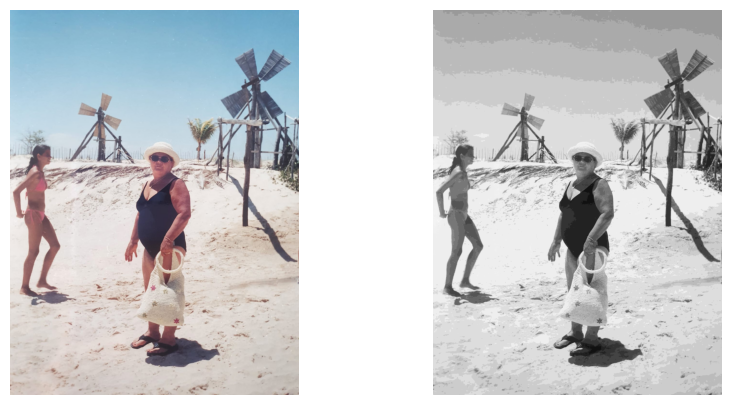

In [291]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.imshow(img)
plt.axis("off")

plt.subplot(122)
plt.imshow(to_image(gray_levels(convert_to_grayscale(img), 15)), cmap = "gray")
plt.axis("off")

In [292]:
from skimage.color import rgb2hsv

(-0.5, 1199.5, 1599.5, -0.5)

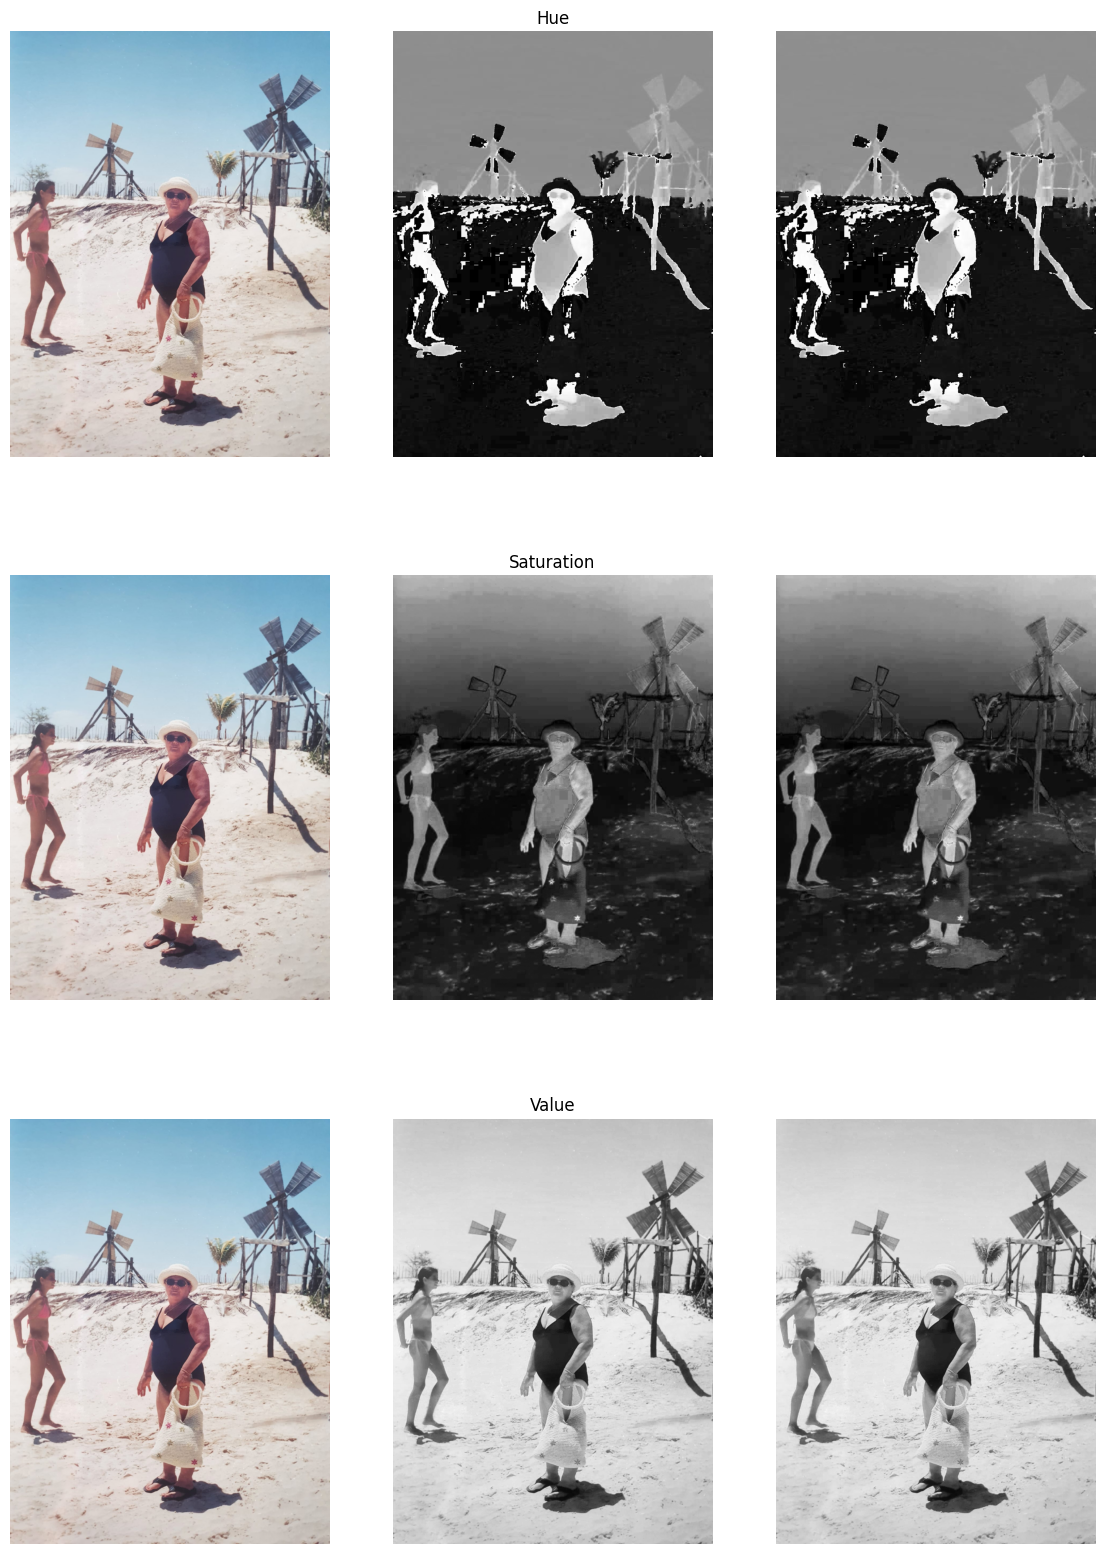

In [293]:
hsv_local = rgb_to_hsv(img)
hsv_padrao = rgb2hsv(img)


plt.figure(figsize = (14, 20))

plt.subplot(331)
plt.imshow(img)
plt.axis("off")

plt.subplot(332)
plt.imshow(hsv_local[:, :, 0], cmap = "gray")
plt.axis("off")
plt.title("Hue")

plt.subplot(333)
plt.imshow(hsv_padrao[:, :, 0], cmap = "gray")
plt.axis("off")

plt.subplot(334)
plt.imshow(img)
plt.axis("off")

plt.subplot(335)
plt.imshow(hsv_local[:, :, 1], cmap = "gray")
plt.axis("off")
plt.title("Saturation")

plt.subplot(336)
plt.imshow(hsv_padrao[:, :, 1], cmap = "gray")
plt.axis("off")

plt.subplot(337)
plt.imshow(img)
plt.axis("off")

plt.subplot(338)
plt.imshow(hsv_local[:, :, 2], cmap = "gray")
plt.axis("off")
plt.title("Value")

plt.subplot(339)
plt.imshow(hsv_padrao[:, :, 2], cmap = "gray")
plt.axis("off")

(-0.5, 1199.5, 1599.5, -0.5)

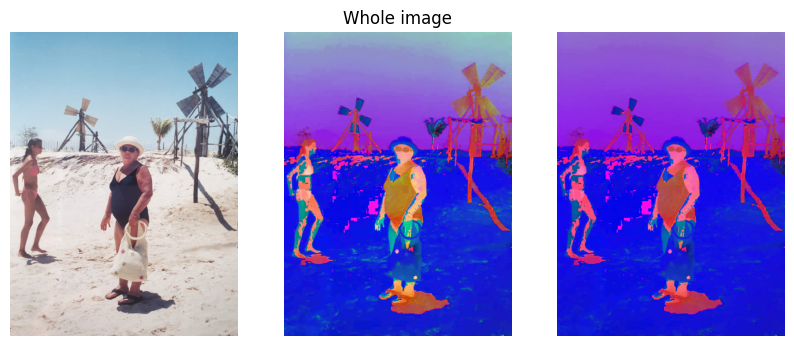

In [294]:

plt.figure(figsize=(10, 10))
plt.subplot(131)
plt.imshow(img)
plt.axis("off")

plt.subplot(132)
plt.imshow(hsv_local, cmap = "gray")
plt.axis("off")
plt.title("Whole image")

plt.subplot(133)
plt.imshow(hsv_padrao, cmap = "gray")
plt.axis("off")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Whole image')

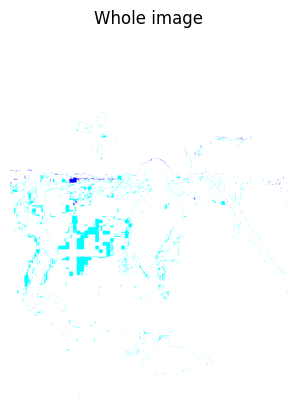

In [296]:
rel = np.zeros(hsv_padrao.shape)

rel[hsv_padrao != 0.0] = hsv_local[hsv_padrao != 0.0]/hsv_padrao[hsv_padrao != 0.0]

plt.imshow(rel, cmap = "gray")
plt.axis("off")
plt.title("Whole image")
